In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving heart.csv to heart.csv


In [3]:
data=pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# **REMOVAL OF OUTLIERS USING BOXPLOT**

In [6]:
data.shape

(1025, 14)

In [7]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()
  

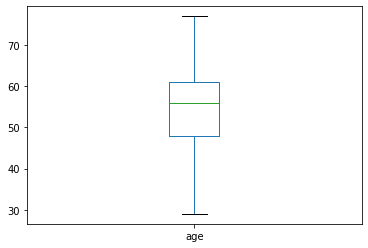

In [8]:
plot_boxplot(data,'age')

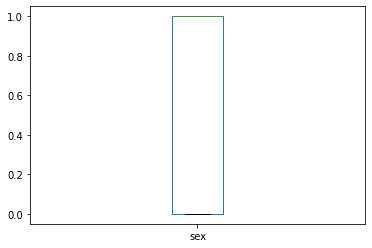

In [9]:
plot_boxplot(data,'sex')

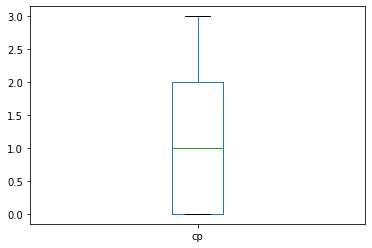

In [10]:
plot_boxplot(data,'cp')

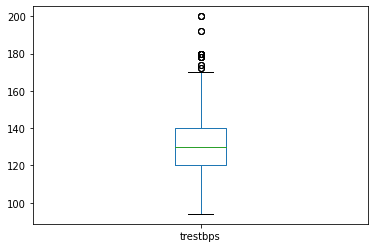

In [11]:
plot_boxplot(data,'trestbps')

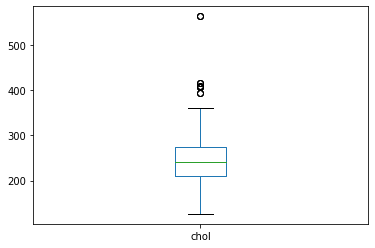

In [12]:
plot_boxplot(data,'chol')

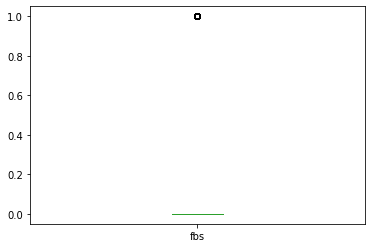

In [13]:
plot_boxplot(data,'fbs')

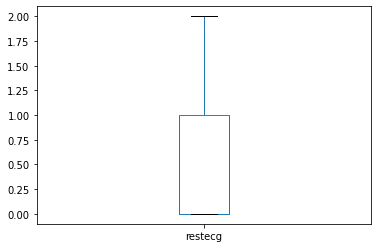

In [14]:
plot_boxplot(data,'restecg')

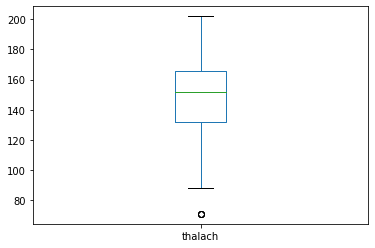

In [15]:
plot_boxplot(data,'thalach')

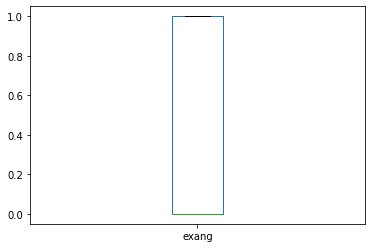

In [16]:
plot_boxplot(data,'exang')

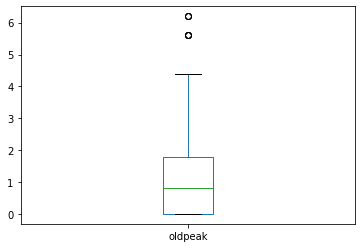

In [17]:
plot_boxplot(data,'oldpeak')

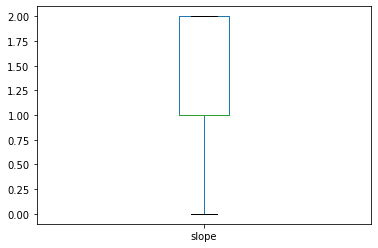

In [18]:
plot_boxplot(data,'slope')

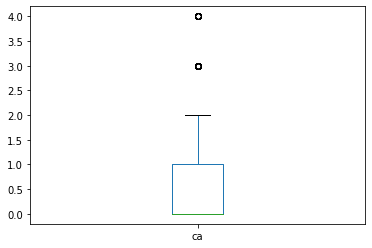

In [19]:
plot_boxplot(data,'ca')

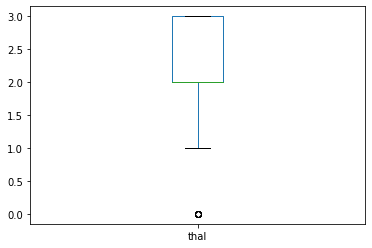

In [20]:
plot_boxplot(data,'thal')

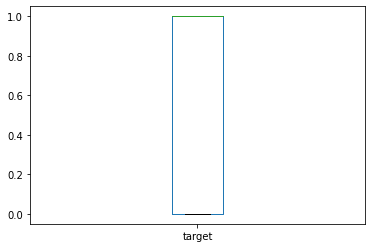

In [21]:
plot_boxplot(data,'target')

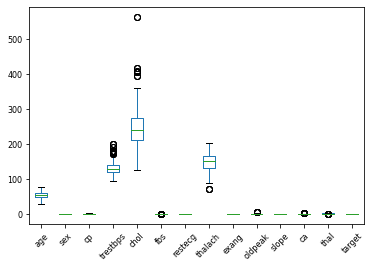

In [22]:
data.boxplot(grid=False,rot=45,fontsize=8)

In [23]:
def Outlier(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  lt=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
  return lt

In [24]:
index_list=[]
for feature in data.columns:
  index_list.extend(Outlier(data,feature))

In [25]:
index_list

[29,
 47,
 87,
 137,
 151,
 175,
 229,
 246,
 257,
 294,
 326,
 343,
 396,
 436,
 452,
 496,
 508,
 509,
 528,
 609,
 624,
 636,
 679,
 688,
 837,
 891,
 896,
 944,
 971,
 986,
 123,
 158,
 179,
 192,
 255,
 450,
 464,
 481,
 542,
 578,
 641,
 665,
 685,
 889,
 958,
 996,
 1,
 4,
 11,
 14,
 19,
 27,
 28,
 47,
 49,
 50,
 63,
 66,
 72,
 74,
 76,
 86,
 89,
 94,
 101,
 112,
 114,
 123,
 127,
 135,
 148,
 154,
 164,
 171,
 175,
 176,
 185,
 187,
 193,
 195,
 202,
 206,
 210,
 228,
 229,
 238,
 240,
 244,
 253,
 264,
 269,
 275,
 285,
 292,
 293,
 294,
 308,
 311,
 336,
 338,
 343,
 348,
 356,
 363,
 365,
 370,
 389,
 390,
 394,
 396,
 399,
 405,
 406,
 411,
 423,
 428,
 445,
 446,
 452,
 455,
 461,
 468,
 475,
 476,
 488,
 489,
 494,
 496,
 508,
 510,
 529,
 552,
 553,
 555,
 569,
 570,
 576,
 580,
 587,
 605,
 610,
 612,
 621,
 622,
 629,
 638,
 653,
 665,
 674,
 679,
 682,
 686,
 688,
 689,
 692,
 708,
 717,
 719,
 734,
 742,
 747,
 755,
 763,
 767,
 768,
 769,
 786,
 788,
 792,
 793,
 79

In [26]:
def remove(df,lt):
  lt=sorted(set(lt))
  df=df.drop(lt)
  return df

In [27]:
data=remove(data,index_list)

In [28]:
data.shape

(769, 14)

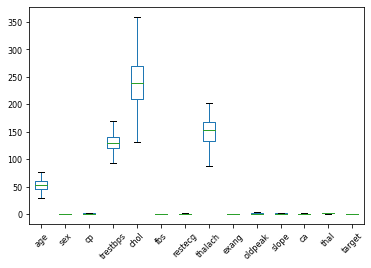

In [29]:
data.boxplot(grid=False,rot=45,fontsize=8)

# **HANDLING MISSING VALUES**



In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


# **Data Balnacing using Synthetic Minority Over-sampling Technique(SMOTE)**

In [32]:
data.target.value_counts()

1    422
0    347
Name: target, dtype: int64

In [33]:
x=data.drop(['target'],axis=1)
y=data.target
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(615, 13) (615,)
(154, 13) (154,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model=KNeighborsClassifier()

In [38]:
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [39]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7207792207792207


col_0,0,1
target,,
0,42,18
1,25,69


In [41]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [43]:
x_smote_train,y_smote_train=smote.fit_resample(x_train.astype('float'),y_train)

In [44]:
from collections import Counter
print("Before applying SMOTE:",Counter(y_train))
print("After applying SMOTE:",Counter(y_smote_train))

Before applying SMOTE: Counter({1: 328, 0: 287})
After applying SMOTE: Counter({0: 328, 1: 328})


# **FEATURE SELECTION**

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
important_features = SelectKBest(score_func=chi2, k=13)
fit = important_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)
features_Scores = pd.concat([data_columns,data_scores],axis=1)
features_Scores.columns = ['Attributes','Score']

In [47]:
featureScores = features_Scores.sort_values(by='Score',ascending=False)
featureScores

,Attributes,Score
7,thalach,451.309044
9,oldpeak,171.425679
11,ca,160.566885
2,cp,120.788355
8,exang,90.361309
0,age,59.672161
4,chol,41.123807
1,sex,32.015546
12,thal,22.046021
10,slope,18.963580


In [48]:
data=data[['thalach','oldpeak','ca','cp','target']]

In [49]:
data.head()

,thalach,oldpeak,ca,cp,target
0,168,1.0,2,0,0
2,125,2.6,0,0,0
3,161,0.0,1,0,0
5,122,1.0,0,0,1
7,145,0.8,1,0,0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y=data['target']
X=data.drop(['target'],axis=1)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(615, 4) (615,)
(154, 4) (154,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm




# fit a model
lm = lm.LogisticRegression()
model = lm.fit(X_train, y_train)
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#model.score(X_test, y_test)
print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.943


In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)

0.8181818181818182


In [56]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=5)
# create the sub models
estimators = []
model1 = LogisticRegression().fit(x_test,y_test)
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('cart', model2))

# create the ensemble model
ensemble = VotingClassifier(estimators)

over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', ensemble)]
pipeline = Pipeline(steps=steps)


results = model_selection.cross_val_score(pipeline, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9921
